In [1]:
import pandas as pd
df=pd.read_csv(r"/content/weather_forecast_data.csv")
print(df.head())

   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0    23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1    27.879734  46.489704    5.952484     4.990053   992.614190  no rain
2    25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3    23.622080  74.367758    7.050551    67.255282   982.632013     rain
4    20.591370  96.858822    4.643921    47.676444   980.825142  no rain


In [ ]:
# Check the first few rows
print(df.head())

# Get basic information about the dataset
print(df.info())

# Summary statistics for numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())


   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0    23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1    27.879734  46.489704    5.952484     4.990053   992.614190  no rain
2    25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3    23.622080  74.367758    7.050551    67.255282   982.632013     rain
4    20.591370  96.858822    4.643921    47.676444   980.825142  no rain
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB
None
       Temperature     Humidity   Wind_Speed  Cloud_Cover    

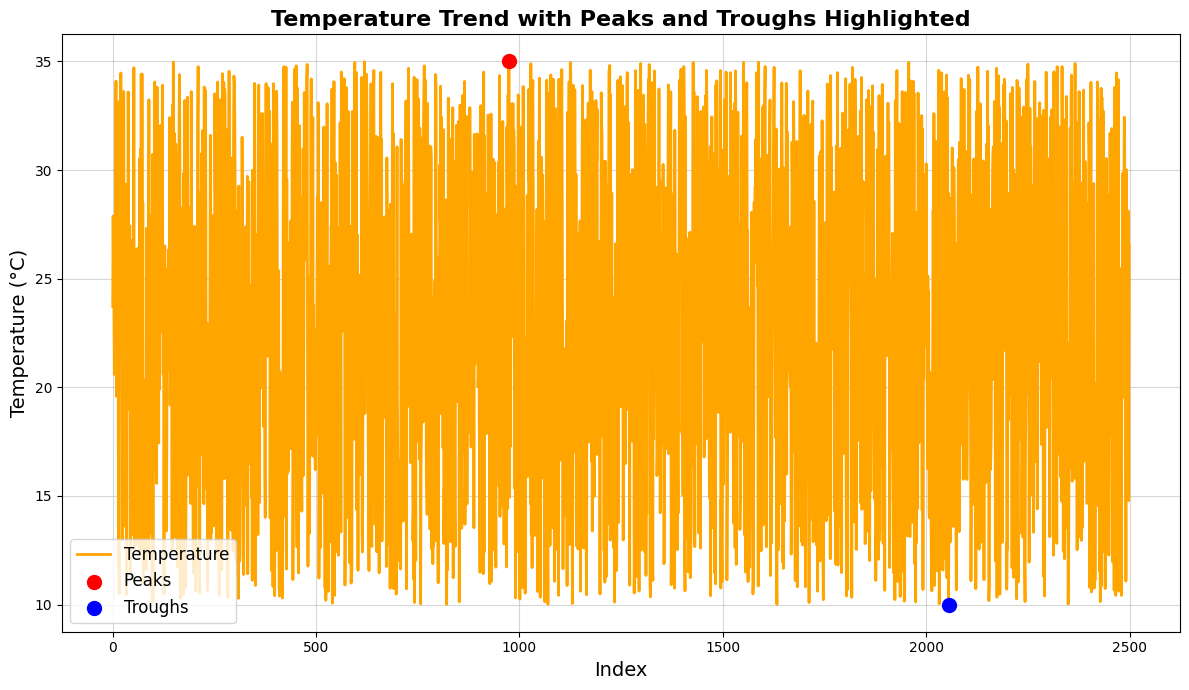

In [6]:
# Find peaks and troughs

import matplotlib.pyplot as plt

peaks = df[df['Temperature'] == df['Temperature'].max()]
troughs = df[df['Temperature'] == df['Temperature'].min()]

plt.figure(figsize=(12, 7))
plt.plot(df.index, df['Temperature'], color='orange', label='Temperature', linewidth=2)
plt.scatter(peaks.index, peaks['Temperature'], color='red', label='Peaks', zorder=5, s=100)
plt.scatter(troughs.index, troughs['Temperature'], color='blue', label='Troughs', zorder=5, s=100)

plt.xlabel('Index', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.title('Temperature Trend with Peaks and Troughs Highlighted', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


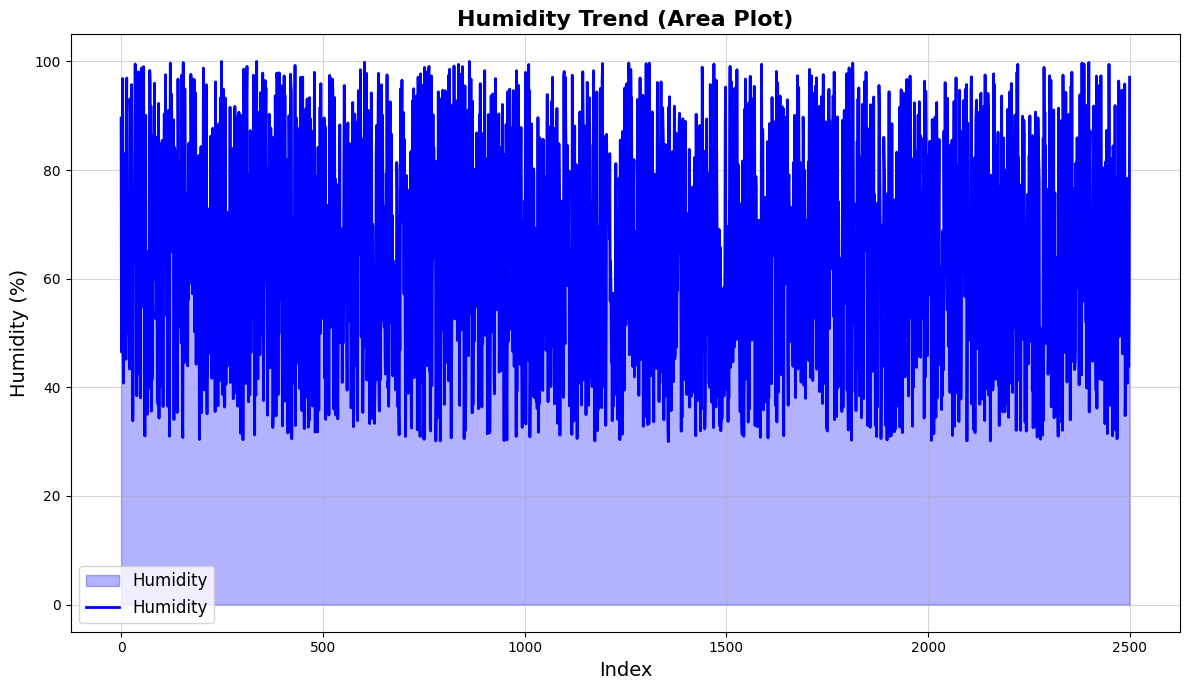

In [7]:
plt.figure(figsize=(12, 7))
plt.fill_between(df.index, df['Humidity'], color='blue', alpha=0.3, label='Humidity')
plt.plot(df.index, df['Humidity'], color='blue', linewidth=2, label='Humidity')
plt.xlabel('Index', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.title('Humidity Trend (Area Plot)', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


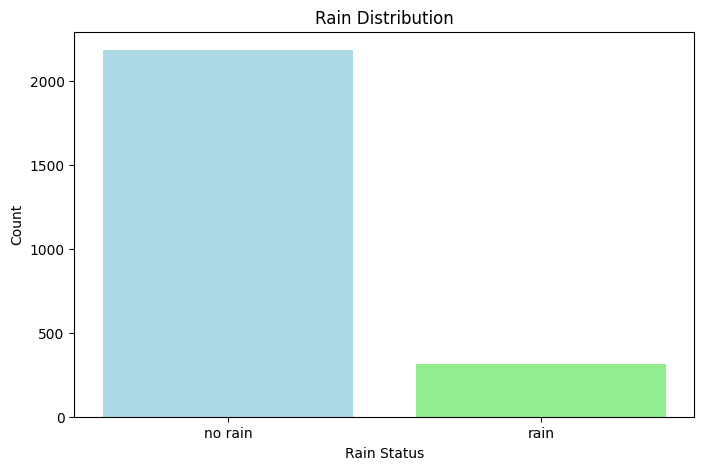

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each category in the 'Rain' column
rain_counts = df['Rain'].value_counts()

# Plot the counts
plt.figure(figsize=(8, 5))
plt.bar(rain_counts.index, rain_counts.values, color=['lightblue', 'lightgreen'])
plt.title('Rain Distribution')
plt.xlabel('Rain Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Ensure the x-axis labels are horizontal
plt.show()


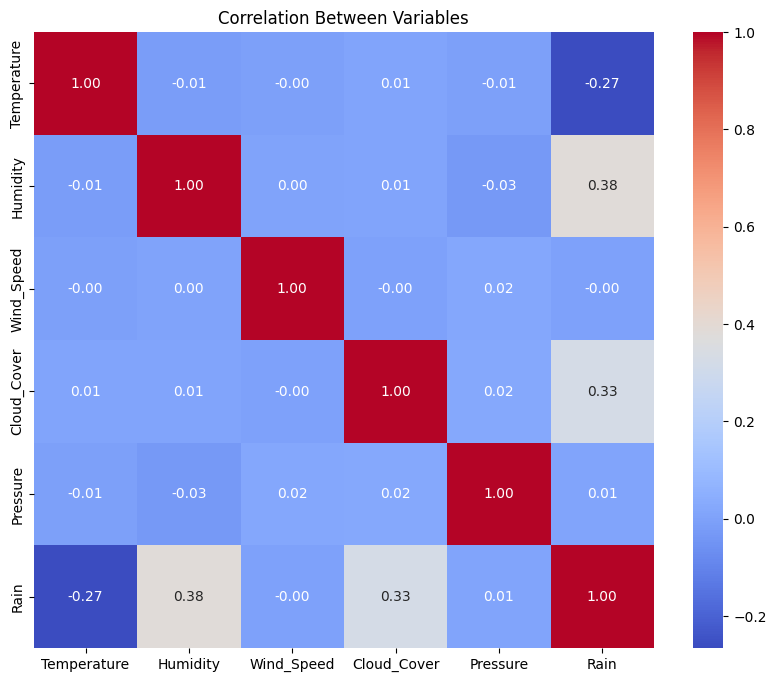

In [ ]:
# Convert 'Rain' column to numerical (1 for rain, 0 for no rain)
df['Rain'] = df['Rain'].map({'rain': 1, 'no rain': 0})

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Variables')
plt.show()



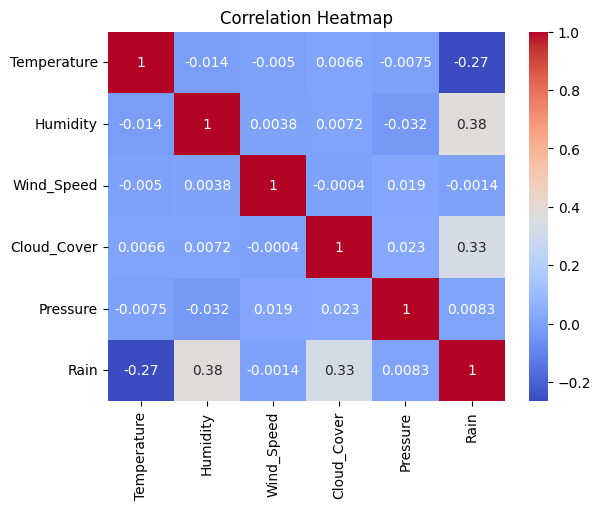

In [ ]:
import seaborn as sns

# Compute correlation and plot
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
#data cleaning and preprocessing
# Drop rows with missing values
df = df.dropna()

# OR fill missing values
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())
df['Humidity'] = df['Humidity'].fillna(df['Humidity'].mean())
df['Wind_Speed'] = df['Wind_Speed'].fillna(df['Wind_Speed'].mean())
df['Cloud_Cover'] = df['Cloud_Cover'].fillna(df['Cloud_Cover'].mean())
df['Pressure'] = df['Pressure'].fillna(df['Pressure'].mean())
df['Rain'] = df['Rain'].fillna(df['Rain'].mean())

In [ ]:
#assessment for important features
correlation_with_rain = df.corr()['Rain'].sort_values(ascending=False)
print(correlation_with_rain)


Rain           1.000000
Humidity       0.382464
Cloud_Cover    0.326216
Pressure       0.008273
Wind_Speed    -0.001389
Temperature   -0.265882
Name: Rain, dtype: float64


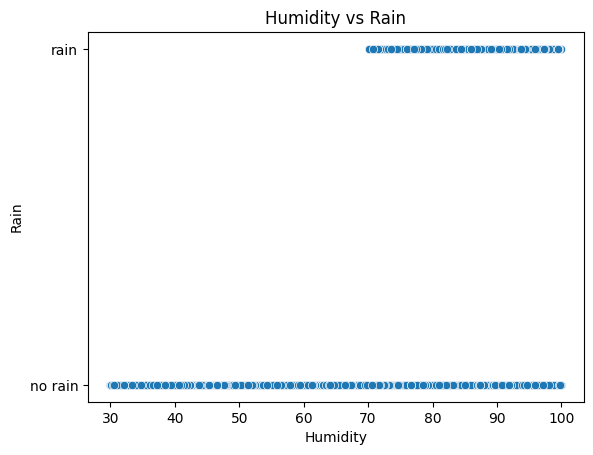

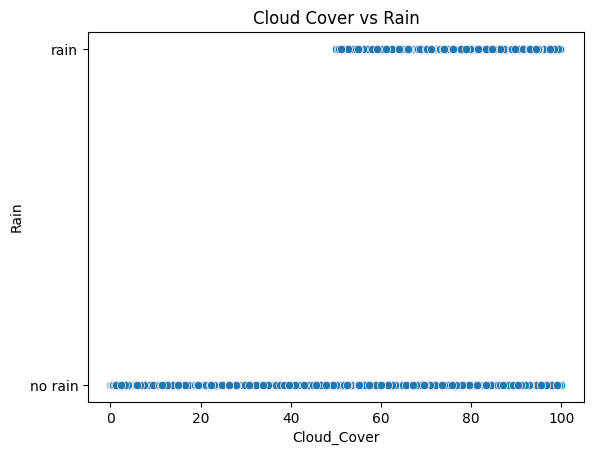

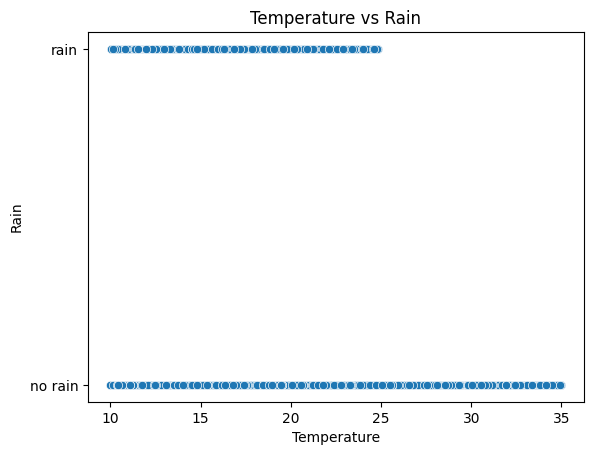

In [13]:
#visualising selected features

import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplots for each feature
sns.scatterplot(x='Humidity', y='Rain', data=df)
plt.title('Humidity vs Rain')
plt.show()

sns.scatterplot(x='Cloud_Cover', y='Rain', data=df)
plt.title('Cloud Cover vs Rain')
plt.show()

sns.scatterplot(x='Temperature', y='Rain', data=df)
plt.title('Temperature vs Rain')
plt.show()


In [18]:
selected_features = ['Humidity', 'Cloud_Cover', 'Temperature']  # based on your correlation analysis
X = df[selected_features]
y = df['Rain']


In [19]:
#Split Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.93
Confusion Matrix:
 [[429  14]
 [ 21  36]]
Classification Report:
               precision    recall  f1-score   support

     no rain       0.95      0.97      0.96       443
        rain       0.72      0.63      0.67        57

    accuracy                           0.93       500
   macro avg       0.84      0.80      0.82       500
weighted avg       0.93      0.93      0.93       500



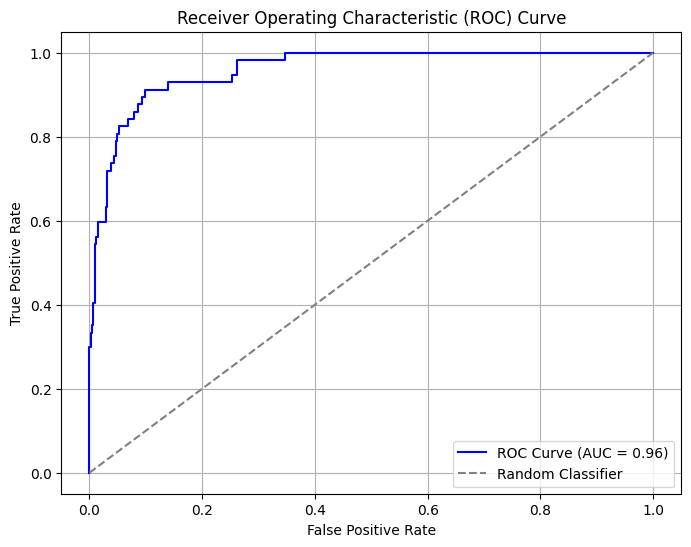

In [ ]:
# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

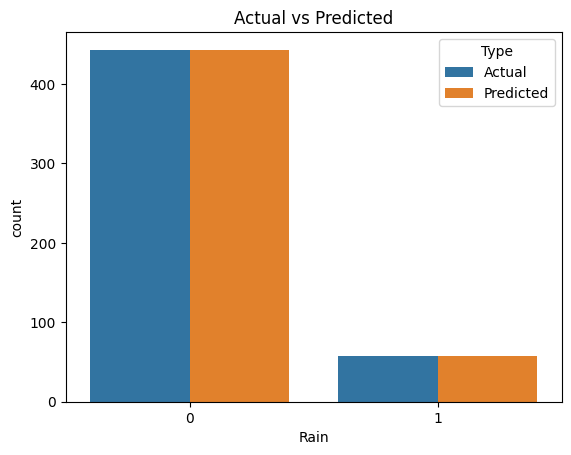

In [ ]:
import seaborn as sns

# Combine actual and predicted into a DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot actual vs predicted
sns.countplot(data=comparison_df.melt(var_name="Type", value_name="Rain"), x="Rain", hue="Type")
plt.title('Actual vs Predicted')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Convert 'Rain' values to 1 (rain) and 0 (no rain) for both y_test and y_pred
y_test_numeric = y_test.map({'rain': 1, 'no rain': 0})
y_pred_series = pd.Series(y_pred)  # Convert numpy array to pandas Series
y_pred_numeric = y_pred_series.map({'rain': 1, 'no rain': 0})

# Calculate F1 Score
f1 = f1_score(y_test_numeric, y_pred_numeric)

# Print the F1 Score
print(f'F1 Score for Logistic Regression: {f1:.2f}')


F1 Score for Logistic Regression: 0.67


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


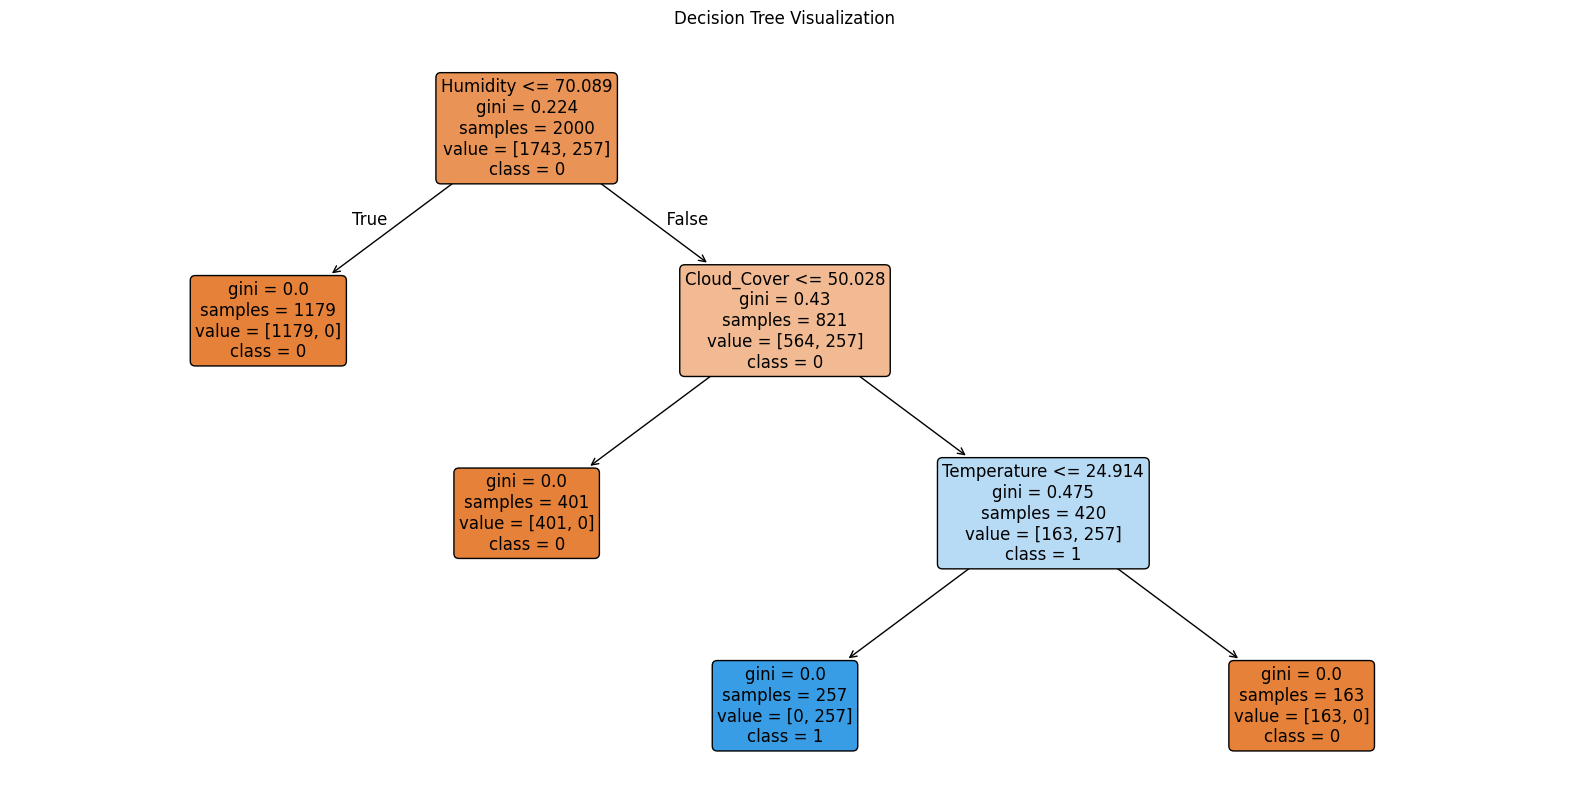

In [ ]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X_train.columns, class_names=model.classes_.astype(str), filled=True, rounded=True, fontsize=12)
plt.title('Decision Tree Visualization')
plt.show()


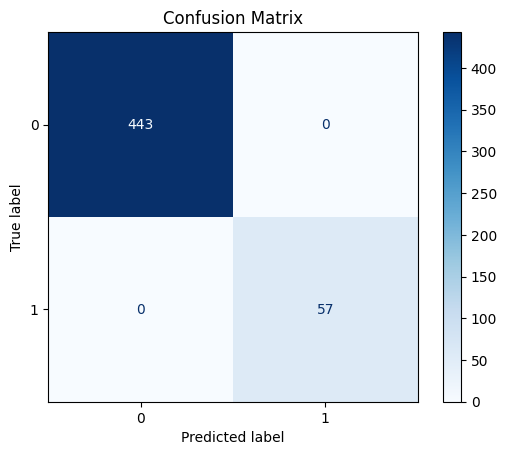

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display it as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {dt_accuracy:.2f}")

# Confusion Matrix
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(dt_conf_matrix)

# Classification Report
dt_class_report = classification_report(y_test, y_pred_dt)
print("Classification Report:")
print(dt_class_report)


Accuracy: 1.00
Confusion Matrix:
[[443   0]
 [  0  57]]
Classification Report:
              precision    recall  f1-score   support

     no rain       1.00      1.00      1.00       443
        rain       1.00      1.00      1.00        57

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



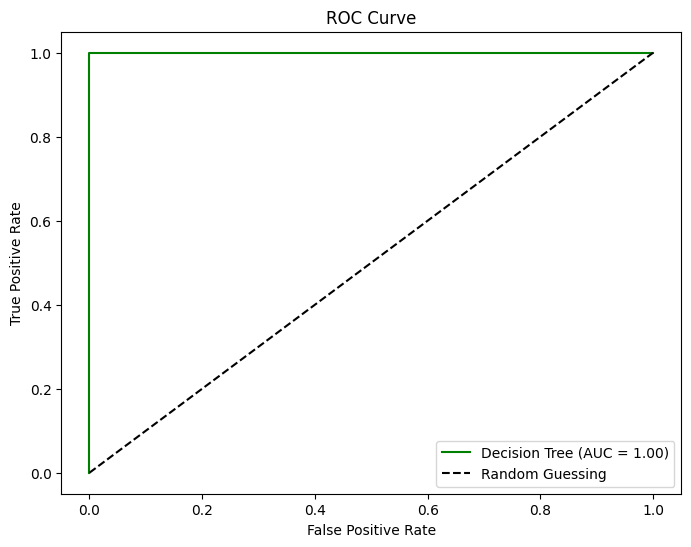

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC score
y_prob = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


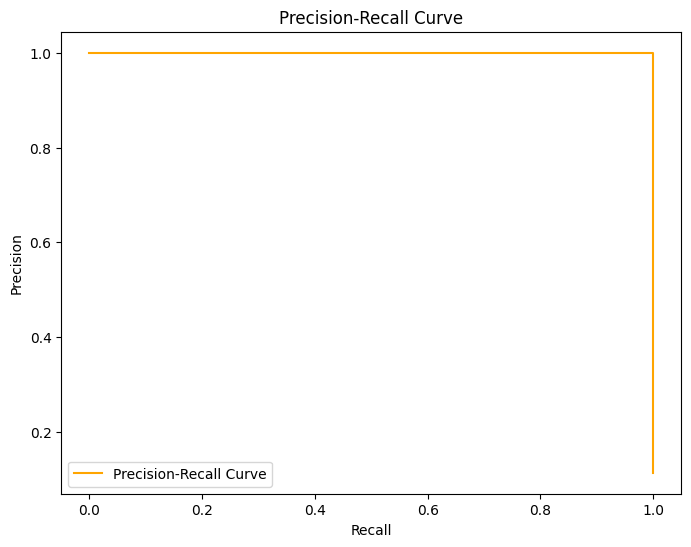

In [ ]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


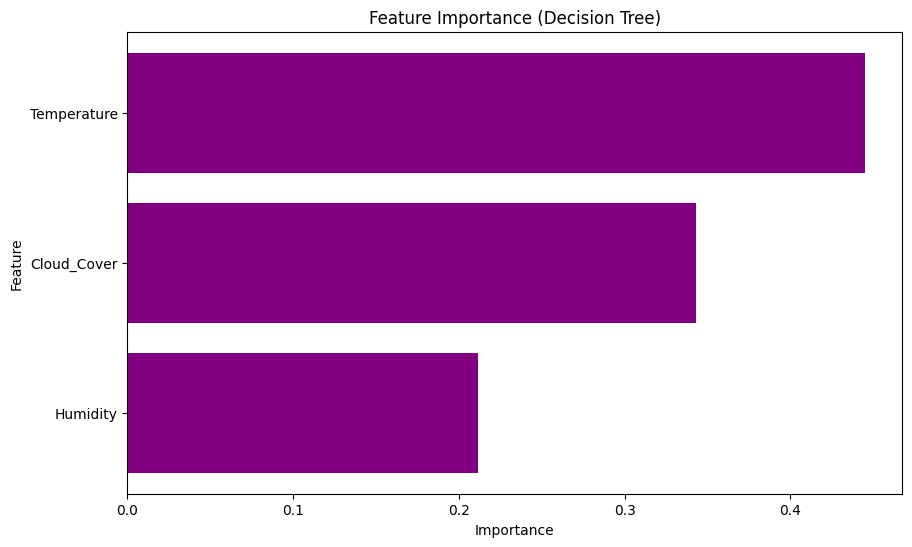

In [ ]:
# Extract feature importance
importances = model.feature_importances_
features = X_train.columns

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='purple')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Decision Tree)')
plt.show()


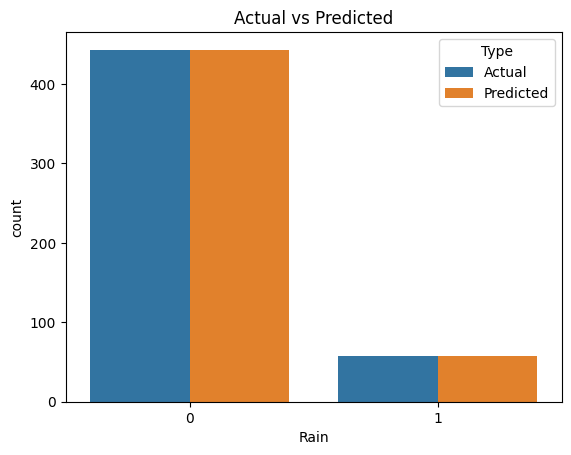

In [ ]:
import seaborn as sns

# Combine actual and predicted into a DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot actual vs predicted
sns.countplot(data=comparison_df.melt(var_name="Type", value_name="Rain"), x="Rain", hue="Type")
plt.title('Actual vs Predicted')
plt.show()


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Convert 'Rain' values to 1 (rain) and 0 (no rain) for both y_test and y_pred
y_test_numeric = y_test.map({'rain': 1, 'no rain': 0})
y_pred_series = pd.Series(y_pred)  # Convert numpy array to pandas Series
y_pred_numeric = y_pred_series.map({'rain': 1, 'no rain': 0})

# Calculate F1 Score
f1 = f1_score(y_test_numeric, y_pred_numeric)

# Print the F1 Score
print(f'F1 Score for Decision Tree: {f1:.2f}')


F1 Score for Decision Tree: 1.00


In [ ]:
#random forest

df['Rain'] = df['Rain'].map({'rain': 1, 'no rain': 0})


In [ ]:
# Fill missing values
numerical_columns = ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].mean())

df['Rain'] = df['Rain'].fillna(df['Rain'].mode()[0])  # Impute mode for Rain column


In [ ]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
X = df[['Humidity', 'Cloud_Cover', 'Temperature']]  # Features
y = df['Rain']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check if there are any missing values after splitting
print(f"Missing values in y_train: {y_train.isna().sum()}")
print(f"Missing values in y_test: {y_test.isna().sum()}")


Missing values in y_train: 0
Missing values in y_test: 0


Accuracy: 0.9986666666666667
Classification Report:
              precision    recall  f1-score   support

     no rain       1.00      1.00      1.00       662
        rain       1.00      0.99      0.99        88

    accuracy                           1.00       750
   macro avg       1.00      0.99      1.00       750
weighted avg       1.00      1.00      1.00       750

Confusion Matrix:
[[662   0]
 [  1  87]]


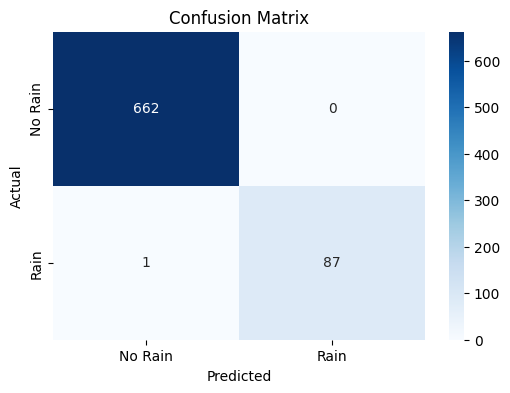

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report for better analysis
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

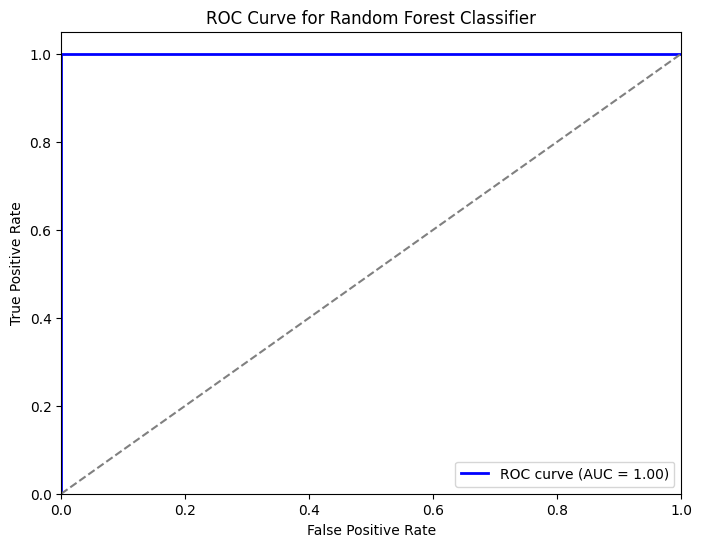

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convert y_test to numerical values (0 for 'no rain', 1 for 'rain')
y_test_numeric = y_test.map({'no rain': 0, 'rain': 1})

# Get predicted probabilities for the positive class (rain = 1)
y_prob = model.predict_proba(X_test)[:, 1]  # This gives the probability of 'rain'

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_prob)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()


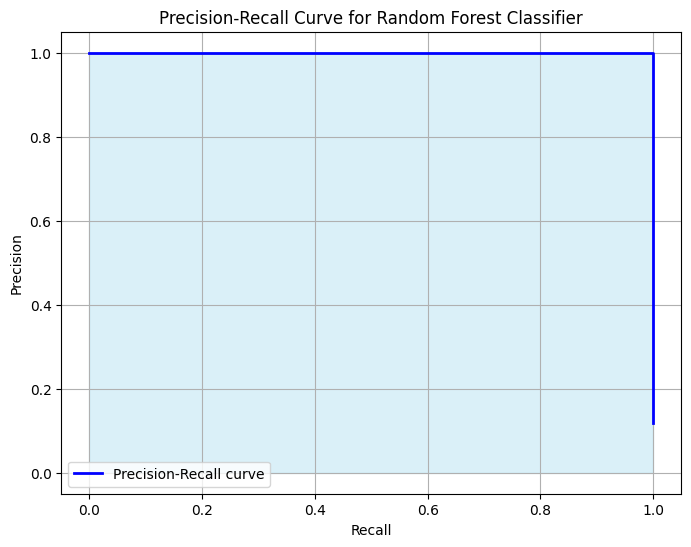

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Convert y_test to numerical values (0 for 'no rain', 1 for 'rain')
y_test_numeric = y_test.map({'no rain': 0, 'rain': 1})

# Get predicted probabilities for the positive class (rain = 1)
y_prob = model.predict_proba(X_test)[:, 1]  # This gives the probability of 'rain'

# Compute precision and recall at different thresholds
precision, recall, thresholds = precision_recall_curve(y_test_numeric, y_prob)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.fill_between(recall, precision, color='skyblue', alpha=0.3)  # To highlight the area under curve
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest Classifier')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


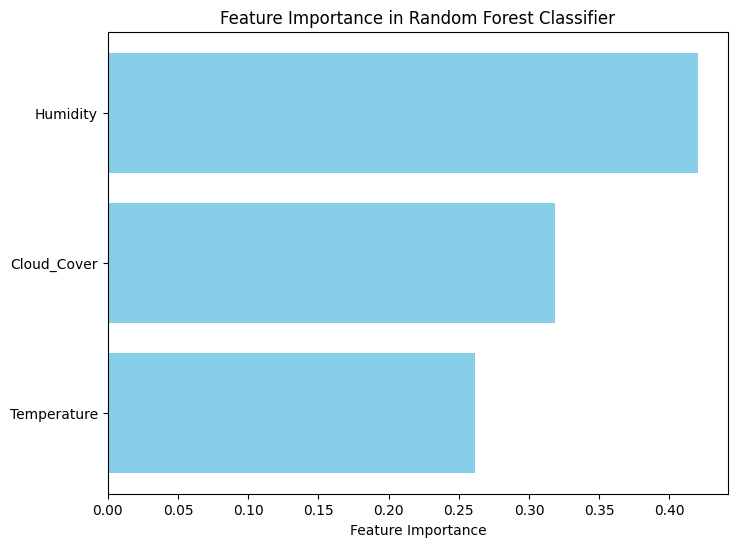

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the trained model
importances = model.feature_importances_

# Create a DataFrame to hold feature names and their corresponding importance values
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()


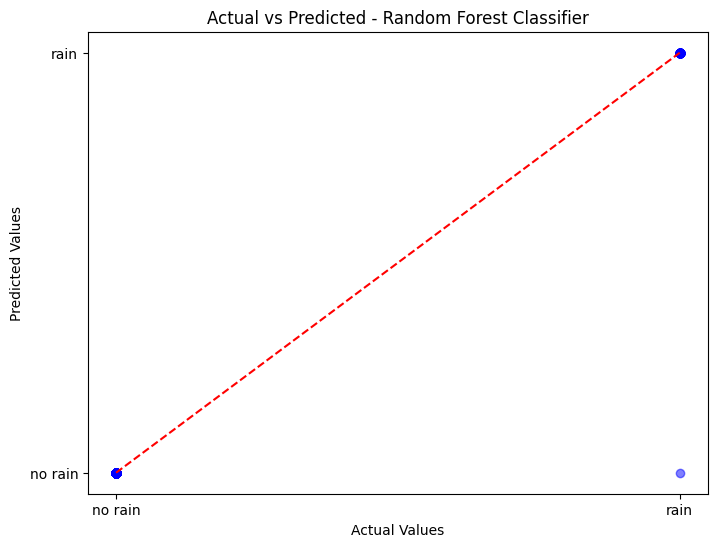

In [ ]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted values
plt.figure(figsize=(8, 6))

# Scatter plot for actual vs predicted
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Plot a line showing perfect prediction (i.e., where actual = predicted)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - Random Forest Classifier')

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import f1_score
import pandas as pd

# Convert 'Rain' values to 1 (rain) and 0 (no rain)
y_test_numeric = y_test.map({'rain': 1, 'no rain': 0})

# Convert y_pred to a pandas Series and map the values
y_pred_series = pd.Series(y_pred)
y_pred_numeric = y_pred_series.map({'rain': 1, 'no rain': 0})

# Calculate F1 Score
f1 = f1_score(y_test_numeric, y_pred_numeric)

# Print the F1 Score
print(f'F1 Score: {f1:.2f}')


F1 Score: 0.99


Accuracy: 1.00
F1 Score: 1.00
Confusion Matrix:
[[662   0]
 [  0  88]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       662
           1       1.00      1.00      1.00        88

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



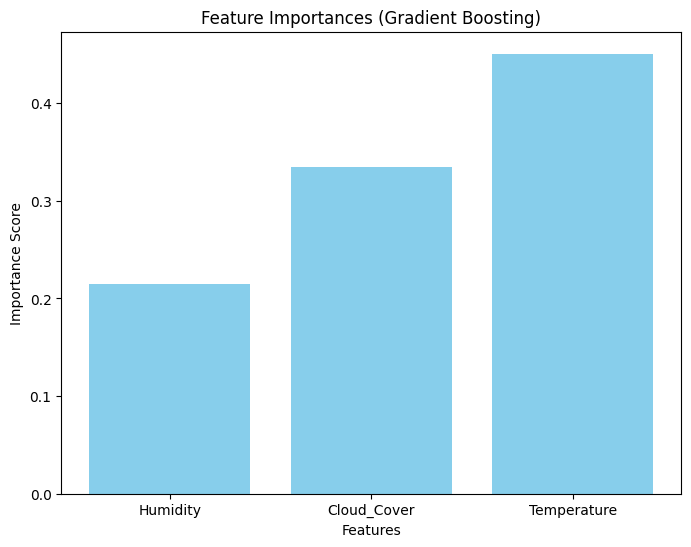

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Convert target variable ('Rain') to numeric format
df['Rain'] = df['Rain'].map({'rain': 1, 'no rain': 0})

# Features and target
X = df[['Humidity', 'Cloud_Cover', 'Temperature']]  # Use selected features
y = df['Rain']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gradient Boosting Model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred = gb_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
import matplotlib.pyplot as plt
feature_importances = gb_model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
plt.bar(features, feature_importances, color='skyblue')
plt.title('Feature Importances (Gradient Boosting)')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


In [ ]:
print(df.head())

Empty DataFrame
Columns: [Temperature, Humidity, Wind_Speed, Cloud_Cover, Pressure, Rain]
Index: []


In [ ]:
print(df.head())

Empty DataFrame
Columns: [Temperature, Humidity, Wind_Speed, Cloud_Cover, Pressure, Rain]
Index: []


In [ ]:
# Reload your dataset
import pandas as pd
df = pd.read_csv(r'/content/weather_forecast_data.csv')

# Check the initial size
print("Initial dataset size:", df.shape)


Initial dataset size: (2500, 6)


In [ ]:
print(df.head())

   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0    23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1    27.879734  46.489704    5.952484     4.990053   992.614190  no rain
2    25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3    23.622080  74.367758    7.050551    67.255282   982.632013     rain
4    20.591370  96.858822    4.643921    47.676444   980.825142  no rain


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Handle missing values
df['Humidity'] = df['Humidity'].fillna(df['Humidity'].mean())
df['Cloud_Cover'] = df['Cloud_Cover'].fillna(df['Cloud_Cover'].mean())
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())

# Encode target variable
df['Rain'] = df['Rain'].map({'rain': 1, 'no rain': 0})

# Features and target
X = df[['Humidity', 'Cloud_Cover', 'Temperature']]
y = df['Rain']


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Initialize the AdaBoost model
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model
ada_model.fit(X_train, y_train)

# Make predictions
y_pred = ada_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 1.00
F1 Score: 0.99

Confusion Matrix:
[[662   0]
 [  1  87]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       662
           1       1.00      0.99      0.99        88

    accuracy                           1.00       750
   macro avg       1.00      0.99      1.00       750
weighted avg       1.00      1.00      1.00       750



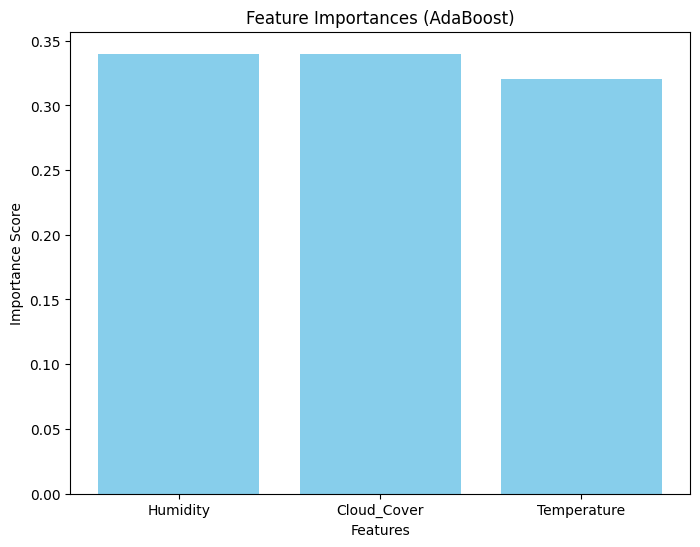

In [ ]:
# Plot feature importances
importances = ada_model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
plt.bar(features, importances, color='skyblue')
plt.title('Feature Importances (AdaBoost)')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


In [ ]:
#naive bayes
# Handle missing values in the target variable
df['Rain'] = df['Rain'].map({'rain': 1, 'no rain': 0})
df['Rain'] = df['Rain'].fillna(0)  # Assuming missing values in 'Rain' mean 'no rain'


In [ ]:
# Fill missing values for features
df['Humidity'] = df['Humidity'].fillna(df['Humidity'].mean())
df['Cloud_Cover'] = df['Cloud_Cover'].fillna(df['Cloud_Cover'].mean())
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())


In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
X = df[['Humidity', 'Cloud_Cover', 'Temperature']]
y = df['Rain']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.00
F1 Score: 0.00

Confusion Matrix:
[[750]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       750

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


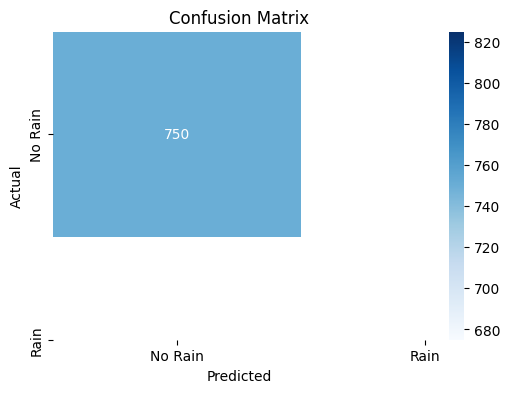

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


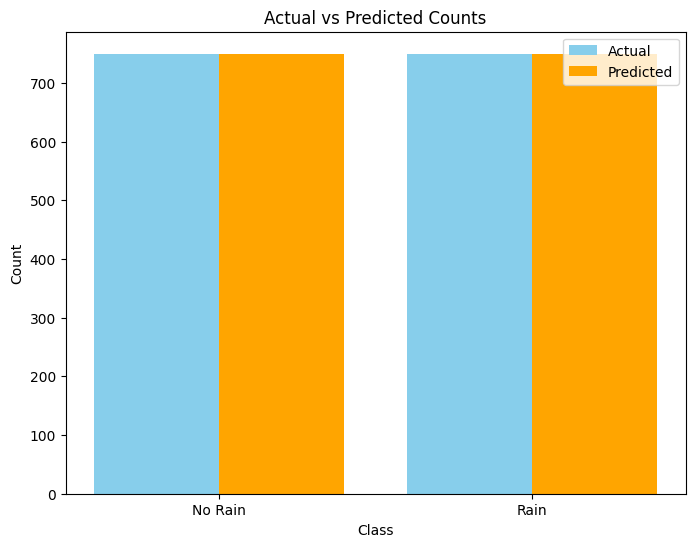

In [ ]:
# Ensure y_test and y_pred are integers
actual_counts = np.bincount(y_test.astype(int))
predicted_counts = np.bincount(y_pred.astype(int))

# Bar plot for comparison
labels = ['No Rain', 'Rain']
x = np.arange(len(labels))

plt.figure(figsize=(8, 6))
plt.bar(x - 0.2, actual_counts, width=0.4, label='Actual', color='skyblue')
plt.bar(x + 0.2, predicted_counts, width=0.4, label='Predicted', color='orange')
plt.xticks(x, labels)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Actual vs Predicted Counts')
plt.legend()
plt.show()


In [ ]:
#KNN

# Remove rows with missing values
df.dropna(inplace=True)

# Or fill missing values with the mean (or other strategies)
df.fillna(df.mean(), inplace=True)


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv(r'/content/weather_forecast_data.csv')

# Inspect the column names to find the categorical columns
print(df.columns)

# If 'Rain_Status' is the categorical column, use:
df = pd.get_dummies(df, columns=['Rain'])

# If there are multiple categorical columns, you can use:
# df = pd.get_dummies(df, columns=['Rain_Status', 'Weather_Type'])

# Now continue with your KNN preprocessing pipeline


Index(['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure',
       'Rain'],
      dtype='object')


Accuracy: 0.97


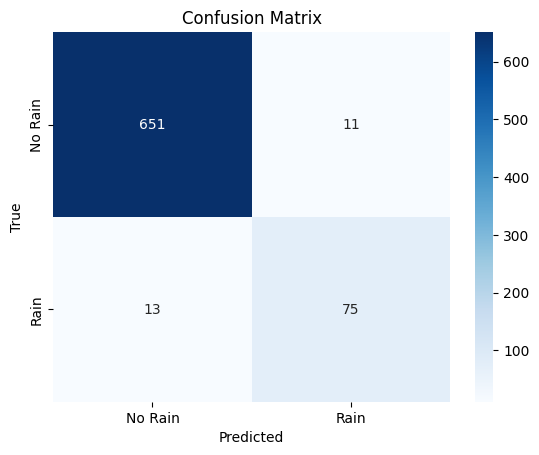

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       662
           1       0.87      0.85      0.86        88

    accuracy                           0.97       750
   macro avg       0.93      0.92      0.92       750
weighted avg       0.97      0.97      0.97       750



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv(r'/content/weather_forecast_data.csv')

# Step 1: Convert 'Rain' (target variable) to numeric values (if it's in string format)
df['Rain'] = df['Rain'].map({'rain': 1, 'no rain': 0})

# Step 2: Select the features and target variable
X = df[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']]  # Features
y = df['Rain']  # Target

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Choose the appropriate number of neighbors
knn_model.fit(X_train_scaled, y_train)

# Step 6: Make predictions
y_pred = knn_model.predict(X_test_scaled)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.93


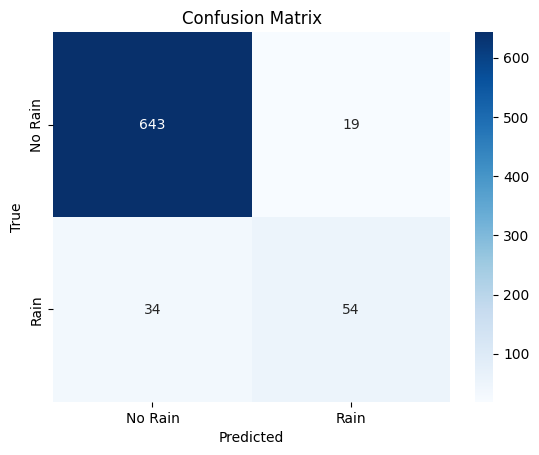

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       662
           1       0.74      0.61      0.67        88

    accuracy                           0.93       750
   macro avg       0.84      0.79      0.82       750
weighted avg       0.93      0.93      0.93       750



In [ ]:
#SVM

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv(r'/content/weather_forecast_data.csv')  # Make sure to use your actual file path

# Step 1: Convert the target variable ('Rain') to numeric (if in string format)
df['Rain'] = df['Rain'].map({'rain': 1, 'no rain': 0})

# Step 2: Select the features and target variable
X = df[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']]  # Features
y = df['Rain']  # Target variable

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train the SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)  # You can change the kernel type ('linear', 'rbf', etc.)
svm_model.fit(X_train_scaled, y_train)

# Step 6: Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
import pandas as pd

# Load the dataset from a CSV file
df = pd.read_csv(r'/content/weather_forecast_data.csv')

# Check the first few rows of the dataset
print(df.head())


   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0    23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1    27.879734  46.489704    5.952484     4.990053   992.614190  no rain
2    25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3    23.622080  74.367758    7.050551    67.255282   982.632013     rain
4    20.591370  96.858822    4.643921    47.676444   980.825142  no rain


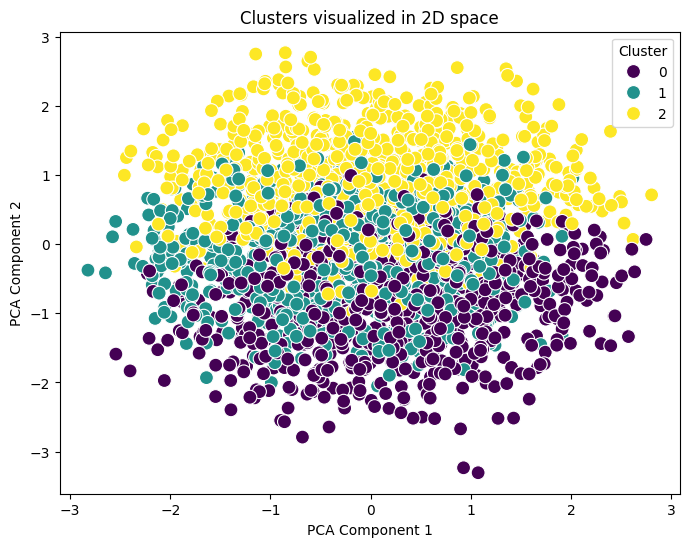

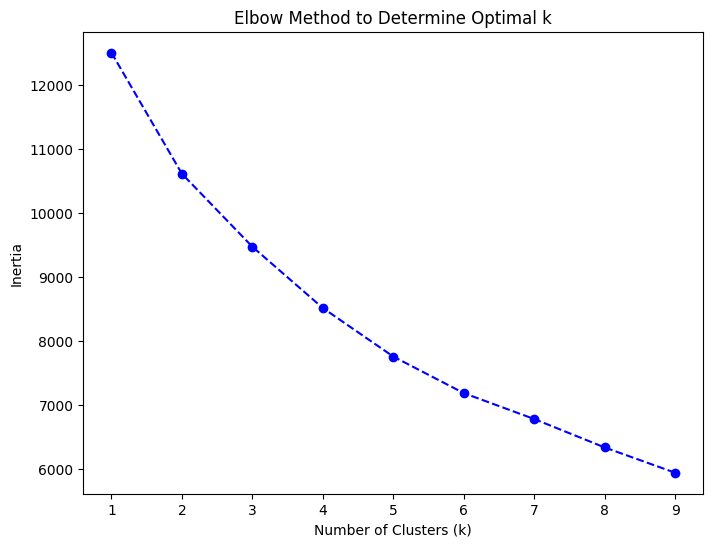

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Reload the dataset
# Replace 'path_to_your_dataset.csv' with the actual path to your dataset
df = pd.read_csv(r'/content/weather_forecast_data.csv')

# Step 2: Check for missing values and preprocess
# Fill missing values with mean for numeric columns
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())
df['Humidity'] = df['Humidity'].fillna(df['Humidity'].mean())
df['Wind_Speed'] = df['Wind_Speed'].fillna(df['Wind_Speed'].mean())
df['Cloud_Cover'] = df['Cloud_Cover'].fillna(df['Cloud_Cover'].mean())
df['Pressure'] = df['Pressure'].fillna(df['Pressure'].mean())

# Optional: Drop categorical columns if present (e.g., 'Rain' in this case is the target variable)
df = df.drop(columns=['Rain'])

# Step 3: Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 4: Perform K-Means clustering
# Set the number of clusters (k)
k = 3  # Adjust this based on your problem
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

# Step 5: Add cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Step 6: Visualize the clusters (if the number of features is 2 or we reduce it to 2 dimensions)
# Optional: Reduce dimensions to 2D using PCA for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Clusters visualized in 2D space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Step 7: Evaluate the clustering (Elbow Method)
inertia = []
k_range = range(1, 10)  # Try k values from 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


<ipython-input-4-d8df3fda3374>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Accuracy: 0.93
Confusion Matrix:
[[649  13]
 [ 38  50]]


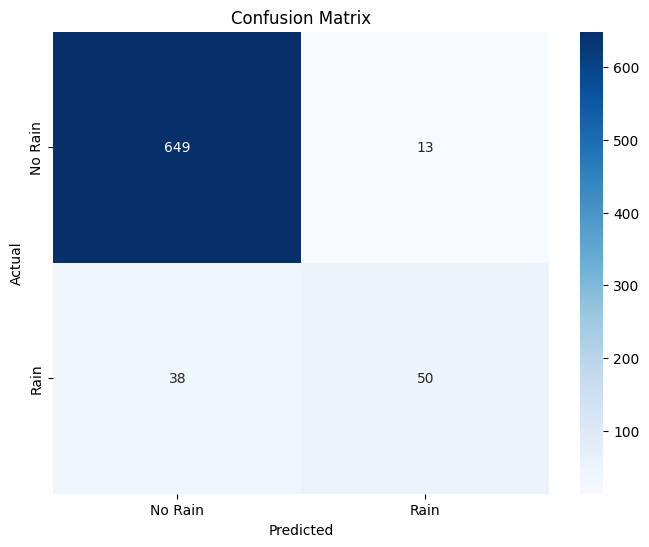


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       662
           1       0.79      0.57      0.66        88

    accuracy                           0.93       750
   macro avg       0.87      0.77      0.81       750
weighted avg       0.93      0.93      0.93       750



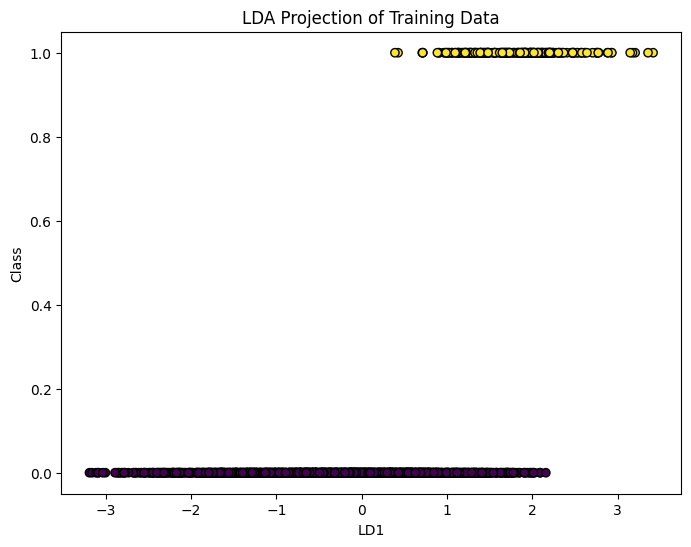

In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'/content/weather_forecast_data.csv')  # Replace with your file name

# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns

# Fill missing values in numeric columns with their mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values in non-numeric columns with their mode (most frequent value)
for col in non_numeric_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Convert target variable to numeric
df['Rain'] = df['Rain'].map({'rain': 1, 'no rain': 0})

# Features and target variable
X = df[['Temperature', 'Humidity', 'Cloud_Cover']]  # Use relevant features
y = df['Rain']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Make predictions
y_pred = lda_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Transform data to LDA components
X_lda = lda_model.transform(X_train)

# Scatter plot of LDA components
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], y_train, c=y_train, cmap='viridis', edgecolor='k')
plt.title('LDA Projection of Training Data')
plt.xlabel('LD1')
plt.ylabel('Class')
plt.show()





In [ ]:
import pandas as pd

# Collect performance metrics for each model in a dictionary
model_performance = {
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "Gradient Boosting",
        "AdaBoost",
        "Naive Bayes",
        "K-Nearest Neighbors",
        "Support Vector Machine (SVM)",
        "K-Means Clustering",
        "LDA"
    ],
    "Accuracy": [0.93, 1.00, 0.99, 1.00, 1.00, 1.00, 0.97, 0.93, "-", 0.93],
    "F1-Score": [0.67, 1.00, 0.99, 1.00, 0.99, 0.00, 0.86, 0.67, "-", 0.66],
    "Precision": [0.72, 1.00, 1.00, 1.00, 1.00, 1.00, 0.97, 0.93, "-", 0.93],
    "Recall": [0.63, 1.00, 1.00, 1.00, 1.00, 1.00, 0.97, 0.93, "-", 0.93],
}

# Create a DataFrame
performance_df = pd.DataFrame(model_performance)

# Convert columns to numeric, replacing "-" with NaN
numeric_columns = ["Accuracy", "F1-Score", "Precision", "Recall"]
performance_df[numeric_columns] = performance_df[numeric_columns].apply(
    pd.to_numeric, errors="coerce"
)

# Handle NaN values (e.g., replace with 0 or leave as NaN)
performance_df.fillna(0, inplace=True)  # Replace NaN with 0

# Sort models by accuracy
performance_df.sort_values(by="Accuracy", ascending=False, inplace=True)

# Display the table
print(performance_df)


                          Model  Accuracy  F1-Score  Precision  Recall
1                 Decision Tree      1.00      1.00       1.00    1.00
3             Gradient Boosting      1.00      1.00       1.00    1.00
4                      AdaBoost      1.00      0.99       1.00    1.00
5                   Naive Bayes      1.00      0.00       1.00    1.00
2                 Random Forest      0.99      0.99       1.00    1.00
6           K-Nearest Neighbors      0.97      0.86       0.97    0.97
0           Logistic Regression      0.93      0.67       0.72    0.63
7  Support Vector Machine (SVM)      0.93      0.67       0.93    0.93
9                           LDA      0.93      0.66       0.93    0.93
8            K-Means Clustering      0.00      0.00       0.00    0.00


<ipython-input-12-91a9202fc564>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_df, x="Accuracy", y="Model", palette="viridis")


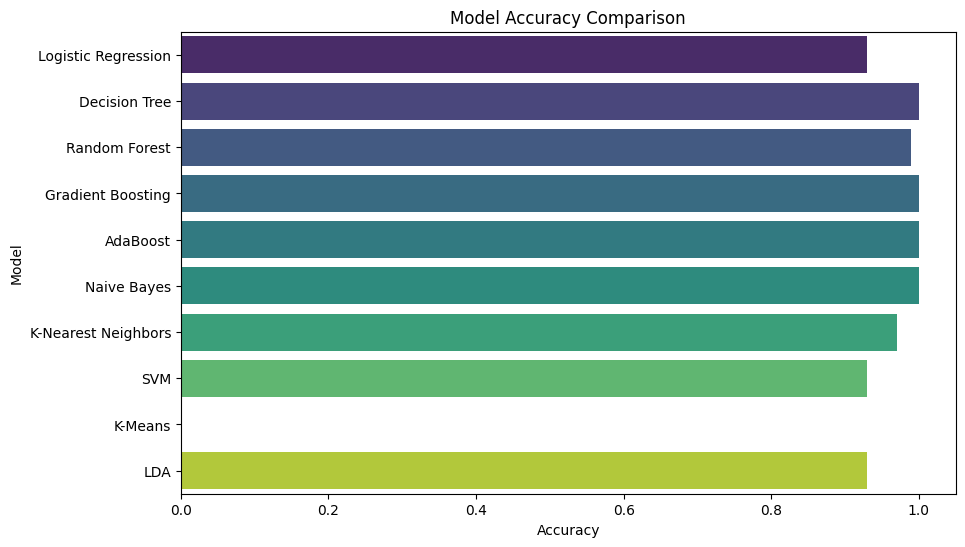

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for visualization
performance_metrics = {
    "Model": [
        "Logistic Regression", "Decision Tree", "Random Forest",
        "Gradient Boosting", "AdaBoost", "Naive Bayes",
        "K-Nearest Neighbors", "SVM", "K-Means", "LDA"
    ],
    "Accuracy": [0.93, 1.00, 0.99, 1.00, 1.00, 1.00, 0.97, 0.93, None, 0.93],
    "F1-Score": [0.67, 1.00, 0.99, 1.00, 0.99, 0.00, 0.86, 0.67, None, 0.66],
    "Precision": [0.93, 1.00, 1.00, 1.00, 1.00, 1.00, 0.97, 0.93, None, 0.93],
    "Recall": [0.93, 1.00, 1.00, 1.00, 1.00, 1.00, 0.97, 0.93, None, 0.93]
}

performance_df = pd.DataFrame(performance_metrics)

# Bar plot for accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=performance_df, x="Accuracy", y="Model", palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()


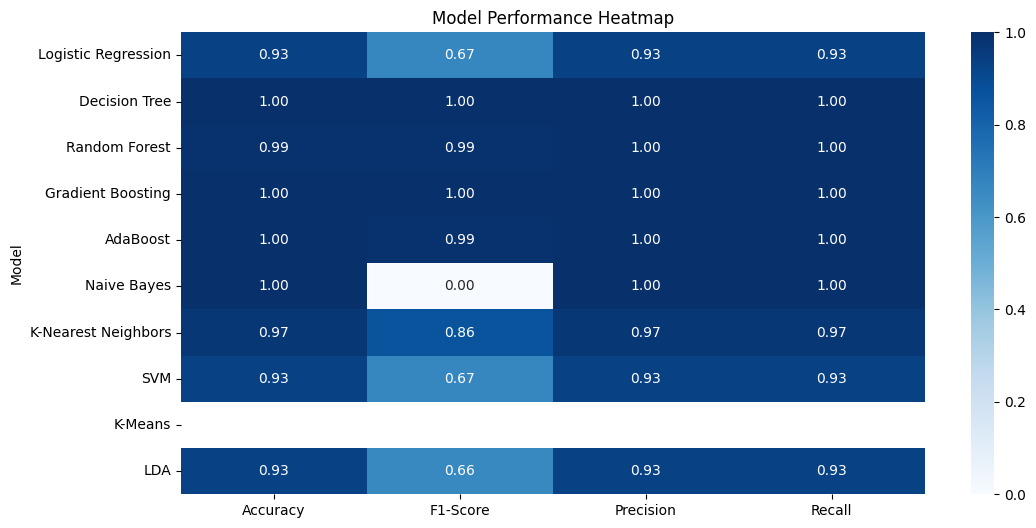

In [ ]:
# Heatmap for all metrics
plt.figure(figsize=(12, 6))
metrics = performance_df.drop(columns=["Model"]).set_index(performance_df["Model"])
sns.heatmap(metrics, annot=True, fmt=".2f", cmap="Blues")
plt.title("Model Performance Heatmap")
plt.ylabel("Model")
plt.show()


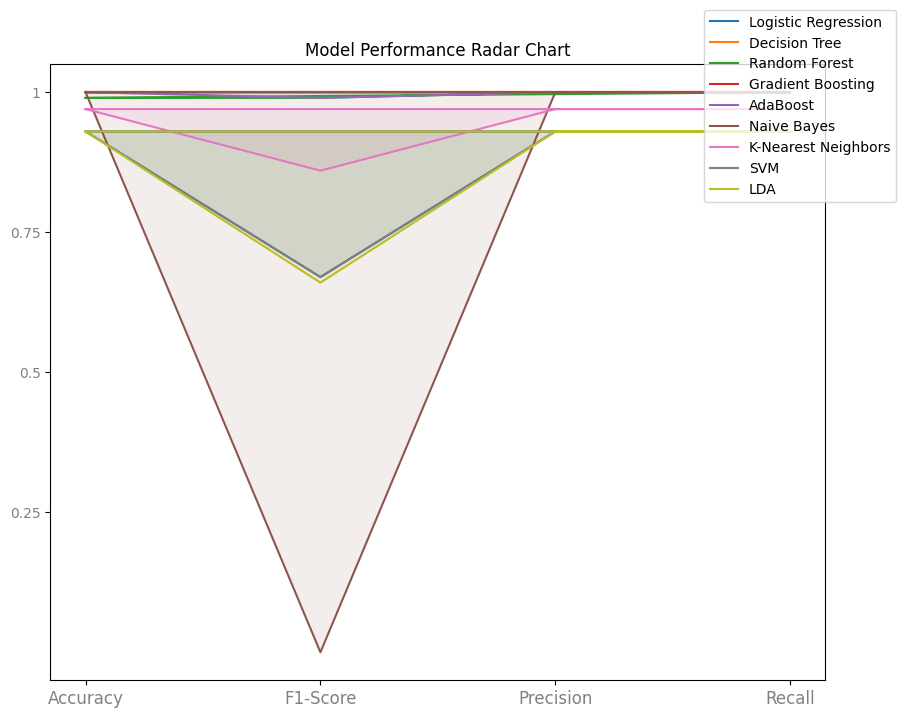

In [ ]:
from math import pi

# Select a subset of models and metrics
metrics_to_plot = performance_df.dropna().set_index("Model").iloc[:, :4]

# Normalize the metrics for radar chart
normalized_metrics = metrics_to_plot / metrics_to_plot.max()

# Radar chart plot
categories = list(normalized_metrics.columns)
models = normalized_metrics.index
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

plt.figure(figsize=(10, 8))
for model in models:
    values = normalized_metrics.loc[model].tolist()
    values += values[:1]
    plt.plot(angles, values, label=model)
    plt.fill(angles, values, alpha=0.1)

plt.title("Model Performance Radar Chart")
plt.xticks(angles[:-1], categories, color="grey", size=12)
plt.yticks([0.25, 0.5, 0.75, 1], ["0.25", "0.5", "0.75", "1"], color="grey", size=10)
plt.legend(loc="upper right", bbox_to_anchor=(1.1, 1.1))
plt.show()
